In [2]:
!pip install wordcloud

In [1]:
# Load two custom modules

import utspdf as pdf
import utsnlp as uts

Package pylibcheck is installed and loaded.
OK: Package numpy is installed.
Installing package "Wikipedia-API"...
DONE: Package Wikipedia-API is up to date.
OK: Package pandas is installed.
OK: Package matplotlib is installed.
OK: Package seaborn is installed.
OK: Package contractions is installed.
OK: Package nltk is installed.
OK: Package wordcloud is installed.
OK: Package plotly is installed.
OK: Package d3blocks is installed.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vitali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vitali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vitali\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
pdf_file="data/Woolworths Group 2024 Sustainability Report.pdf"
#pdf_url="https://www.woolworthsgroup.com.au/content/dam/wwg/investors/reports/f24/f24/Woolworths%20Group%202024%20Sustainability%20Report.pdf"
#pdf_file="data/2024-ACEA.pdf"

In [3]:
text_raw = pdf.extract_pdf_text(pdf_file) # Additional options: per_page=True, max_pages=5

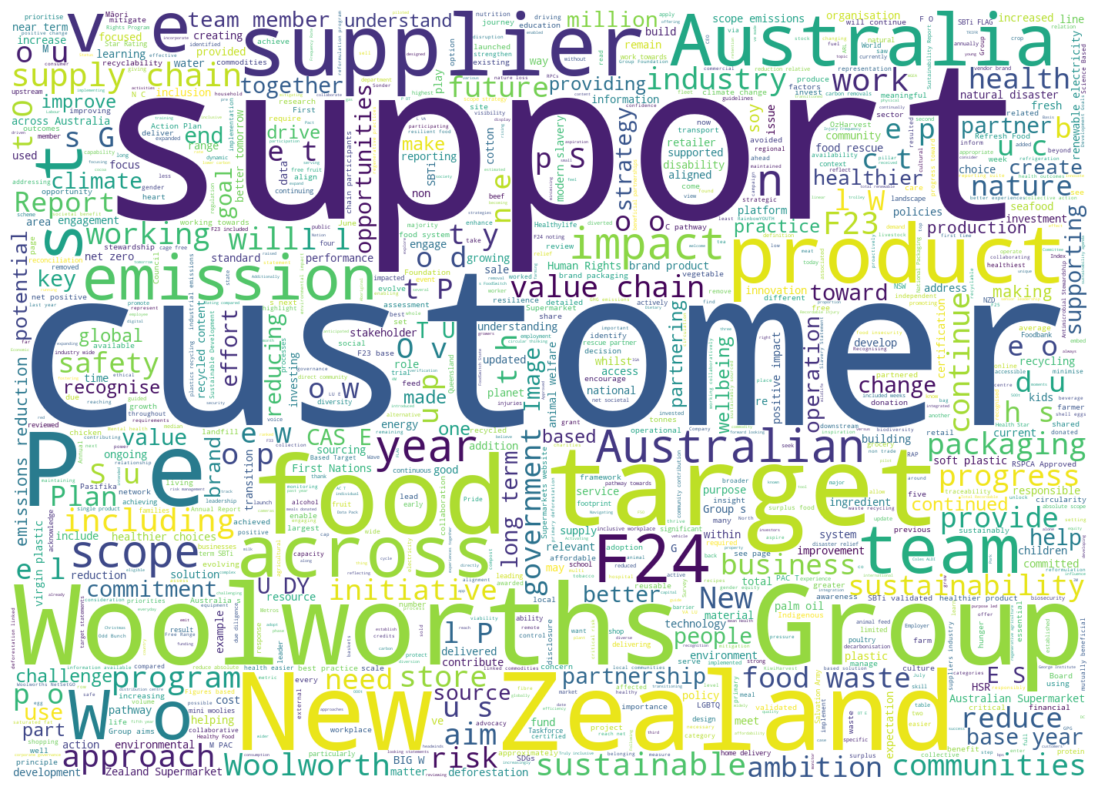

In [4]:
pdf.show_wordcloud(text_raw,max_words=1000, width=1400, height=1000)

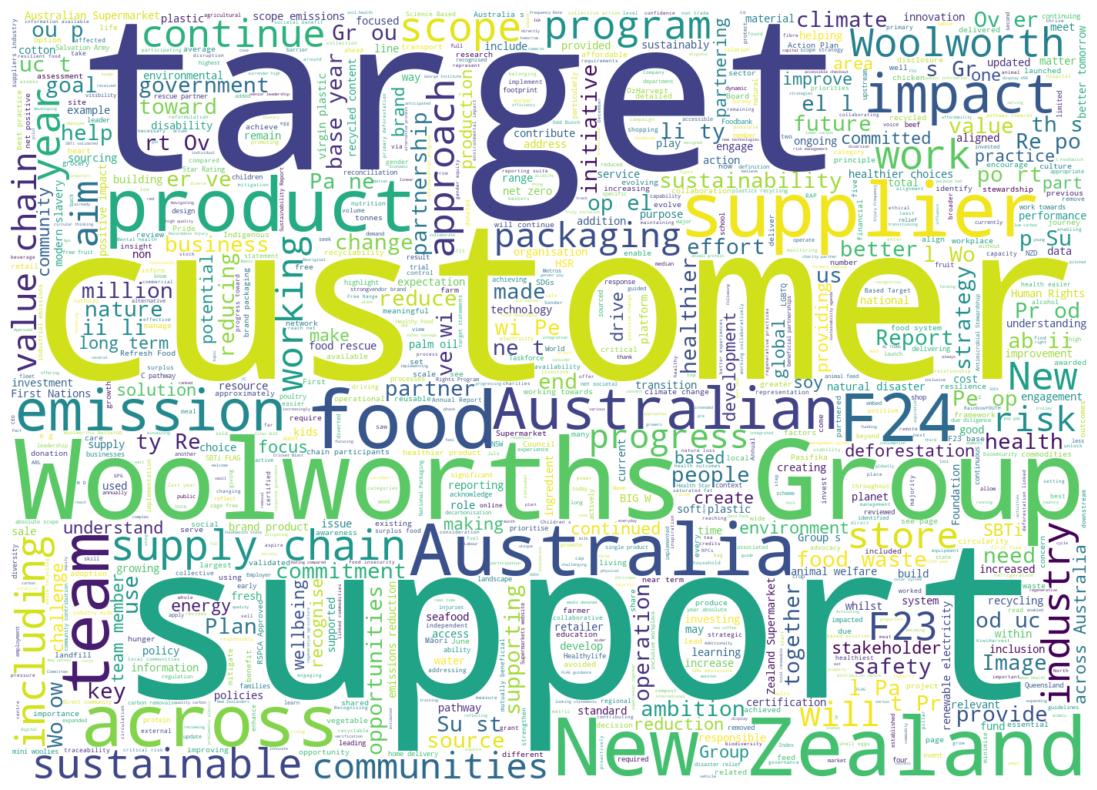

In [5]:
text_clean = pdf.clean_pdf_text(text_raw)

pdf.show_wordcloud(text_clean,max_words=1000, width=1400, height=1000)

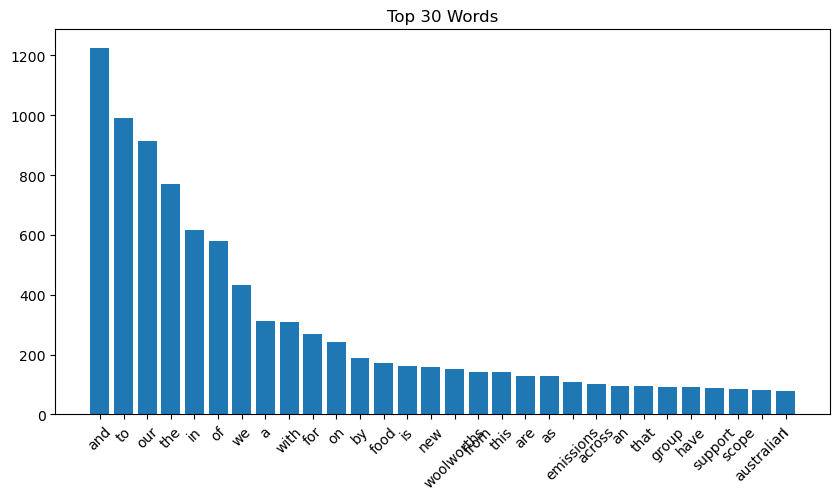

In [7]:
uts.plot_top_words(text_clean, n=30)

In [8]:
text_processed=uts.preprocess_text(text_clean, 
                    remove_text_in_brackets=True,
                    remove_url=True,
                    remove_html_tags=True,
                    to_lower=True, 
                    expand_contractions=True,
                    remove_punctuation=True, 
                    remove_digits=True, 
                    remove_stopwords=True, 
                    remove_short_words_leq = 3,
                    lemmatize=True, 
                    stem=False, 
                    custom_stopwords=None,
                    custom_brackets=None)

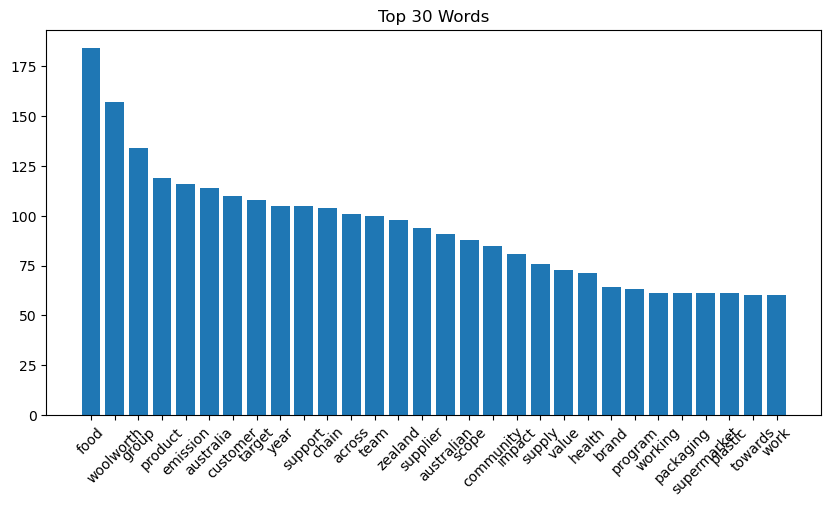

In [9]:
uts.plot_top_words(text_processed, n=30)

In [8]:
uts.plot_ngram_network_d3(
    text_processed,
    n=2,
    top_k_edges=100,
    min_count=2,
    stopwords={"the","and","of","to","in","for","with","on","our","we"},
    filepath="bigrams_interactive.html",
    title="Bigram co-occurrence network",
    dark_mode=False
)

[18-08-2025 13:50:52] [d3blocks.d3blocks] [INFO] Cleaning edge_properties and config parameters..
[18-08-2025 13:50:52] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[18-08-2025 13:50:52] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[18-08-2025 13:50:52] [d3graph.d3graph] [INFO] Set directed=True to see the markers!
[18-08-2025 13:50:52] [d3graph.d3graph] [INFO] Keep only edges with weight>0
[18-08-2025 13:50:52] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[18-08-2025 13:50:52] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[18-08-2025 13:50:52] [d3graph.d3graph] [INFO] Converting adjacency matrix into source-target..
[18-08-2025 13:50:52] [colourmap.colourmap] [WARNING] Colormap [Set1] can not create [35] unique colors! Available unique colors: [9].
[18-08-2025 13:50:52] [d3graph.d3graph] [INFO] Number of unique nodes: %.0d
[18-08-2025 13:50:52] [d3graph.d3graph] [INFO] Slider range is set to [5, 99]
[18-08-20

('bigrams_interactive.html',
          source     target  weight
 0     woolworth      group      99
 1        supply      chain      61
 2          food      waste      43
 3         scope   emission      43
 4         value      chain      43
 ..          ...        ...     ...
 95         line       sbti       6
 96     absolute      scope       6
 97       target  statement       6
 98         free      fruit       6
 99  supermarket    website       6
 
 [100 rows x 3 columns])

In [9]:
# 1) Windowed semantic network with PPMI weighting (recommended quick start)
uts.plot_semantic_network_d3(
    text_processed,
    mode="window",
    window_size=5,
    weight="ppmi",
    top_k_edges=100,
    min_count=2,
    stopwords={"the","and","of","to","in","for","with","on","our","we"},
    filepath="network_window_ppmi.html",
    title="Windowed semantic network (PPMI)"
)

[18-08-2025 13:51:06] [d3blocks.d3blocks] [INFO] Cleaning edge_properties and config parameters..
[18-08-2025 13:51:06] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[18-08-2025 13:51:06] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[18-08-2025 13:51:06] [d3graph.d3graph] [INFO] Set directed=True to see the markers!
[18-08-2025 13:51:06] [d3graph.d3graph] [INFO] Keep only edges with weight>0
[18-08-2025 13:51:06] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[18-08-2025 13:51:06] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[18-08-2025 13:51:06] [d3graph.d3graph] [INFO] Converting adjacency matrix into source-target..
[18-08-2025 13:51:06] [colourmap.colourmap] [WARNING] Colormap [Set1] can not create [66] unique colors! Available unique colors: [9].
[18-08-2025 13:51:06] [d3graph.d3graph] [INFO] Number of unique nodes: %.0d
[18-08-2025 13:51:06] [d3graph.d3graph] [INFO] Slider range is set to [8, 12]
[18-08-20

('network_window_ppmi.html',
         source                                             target     weight
 0     parental                                                pay  11.924600
 1     parental                                     superannuation  11.924600
 2      edelman  wwwwhointhealthtopicschildrenenvironmentalheal...  11.924600
 3    barometer                                            edelman  11.924600
 4     evacuate                                              wujal  11.924600
 ..         ...                                                ...        ...
 95    alliance                                         rainforest  10.146993
 96    facility                                              taree   9.994990
 97  respondent                                             survey   9.977068
 98        mini                                        sommerville   9.977068
 99       solar                                          totalling   9.977068
 
 [100 rows x 3 columns])

In [10]:
# 2) Dependency network (requires spaCy model: python -m spacy download en_core_web_sm)
uts.plot_semantic_network_d3(
    text_processed,
    mode="dependency",
    weight="freq",                  # dependency links are already selective; freq often works well
    top_k_edges=100,
    min_count=2,
    keep_entities=True,
    filepath="network_dependency.html",
    title="Dependency network"
)

[18-08-2025 13:51:19] [d3blocks.d3blocks] [INFO] Cleaning edge_properties and config parameters..
[18-08-2025 13:51:19] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[18-08-2025 13:51:19] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[18-08-2025 13:51:19] [d3graph.d3graph] [INFO] Set directed=True to see the markers!
[18-08-2025 13:51:19] [d3graph.d3graph] [INFO] Keep only edges with weight>0
[18-08-2025 13:51:19] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[18-08-2025 13:51:19] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[18-08-2025 13:51:19] [d3graph.d3graph] [INFO] Converting adjacency matrix into source-target..
[18-08-2025 13:51:19] [colourmap.colourmap] [WARNING] Colormap [Set1] can not create [25] unique colors! Available unique colors: [9].
[18-08-2025 13:51:19] [d3graph.d3graph] [INFO] Number of unique nodes: %.0d
[18-08-2025 13:51:19] [d3graph.d3graph] [INFO] Slider range is set to [4, 86]
[18-08-20

('network_dependency.html',
       source       target  weight
 0      group    woolworth    86.0
 1      chain       supply    45.0
 2      waste         food    44.0
 3   emission        scope    32.0
 4       year         base    27.0
 ..       ...          ...     ...
 95     reach     emission     5.0
 96      year     absolute     5.0
 97   program     emission     5.0
 98       kid        fruit     5.0
 99     metro  supermarket     5.0
 
 [100 rows x 3 columns])

In [12]:
# 3) Adjacent trigrams as phrases on the left, PPMI weighting
uts.plot_semantic_network_d3(
    text_processed,
    mode="adjacent",
    n=3,
    weight="ppmi",
    top_k_edges=100,
    filepath="network_adjacent_trigrams.html",
    title="Adjacent trigram network (PPMI)"
)

[18-08-2025 13:06:34] [d3blocks.d3blocks] [INFO] Cleaning edge_properties and config parameters..
[18-08-2025 13:06:34] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[18-08-2025 13:06:34] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[18-08-2025 13:06:34] [d3graph.d3graph] [INFO] Set directed=True to see the markers!
[18-08-2025 13:06:34] [d3graph.d3graph] [INFO] Keep only edges with weight>0
[18-08-2025 13:06:34] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[18-08-2025 13:06:34] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[18-08-2025 13:06:34] [d3graph.d3graph] [INFO] Converting adjacency matrix into source-target..
[18-08-2025 13:06:34] [colourmap.colourmap] [WARNING] Colormap [Set1] can not create [97] unique colors! Available unique colors: [9].
[18-08-2025 13:06:34] [d3graph.d3graph] [INFO] Number of unique nodes: %.0d
[18-08-2025 13:06:34] [d3graph.d3graph] [INFO] Slider range is set to [12, 15]
[18-08-2

('network_adjacent_trigrams.html',
               source             target     weight
 0   aboriginal torre             strait  14.744624
 1       torre strait           islander  14.744624
 2       rainbow tick      accreditation  14.744624
 3        cost ential  echainopportunity  14.744624
 4     grower diverse              buyer  14.744624
 ..               ...                ...        ...
 95     retail career              today  13.159661
 96  lead responsible          retailing  13.159661
 97  access inclusion              index  13.159661
 98  district netball        association  13.159661
 99     remove carbon               emit  13.159661
 
 [100 rows x 3 columns])